# Memoization & Dynamic Programming 

### Topics to discuss today:

<ul>
    <li>Time and Space Complexity  of recursive fibonnaci</li>
    <li>The fibonacci Tree</li>
    <li>storing solutions to sub problems</li>
    <li>solving popular problems</li>
</ul>
<br><br><br><br>

### The Fibonacci sequence

In [8]:
# Write out a function to find the nth number in the fibonnaci sequence
def fib(n):
    if n <= 1:
        return n   
    else: 
        # exponential time complexity
        return fib(n-1) + fib(n-2)
        
fib(40)


        
    

102334155

In [15]:
#iterative fibonacci
# anything you do recursively you can do iteratively
def fibonacci_iter(n):
    fib_list = [0, 1]

    for i in range(2, n + 1):
        next_fib = fib_list[-1] + fib_list[-2]
        fib_list.append(next_fib)

    return fib_list
fibonacci_iter(40)

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025,
 121393,
 196418,
 317811,
 514229,
 832040,
 1346269,
 2178309,
 3524578,
 5702887,
 9227465,
 14930352,
 24157817,
 39088169,
 63245986,
 102334155]

In [18]:
#Dealing with Time space and recursion
def dib(n): 
    if n <= 1:
        return n
    else:
        return dib(n-1) #extra call on the stack O(n)

dib(20)

1

Calculating the time space complexity of the Fibbonacci sequence


## Trees

the fibonacci sequence can be visualized using a tree structure. Lets look at the elements of a tree before discussing the fibonnaci tree:

<img src="https://www.tutorialspoint.com/data_structures_algorithms/images/binary_tree.jpg" style="height:400px;">

Let's look at the fibonnaci tree:

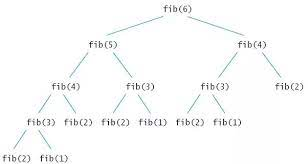

## Memoization

#### What is it?

In computing, memoization or memoisation is an optimization technique used primarily to speed up computer programs by storing the results of expensive function calls and returning the cached result when the same inputs occur again. Memoization has also been used in other contexts (and for purposes other than speed gains), such as in simple mutually recursive descent parsing.

#### When should we use it?

Some problems are largely made of <b>overlapping subproblems</b>. When we find our code is solving the same problem multiple times over it's a good idea to store them so we don't have to recompute those solutions. This is known as Dynamic Programming 

In [22]:
#The super power of Dictionaries
def fib(n, cache = {}):
    if n in cache:
        return cache[n]
    if n <= 1:
        return n
    else:
        cache[n] = fib(n - 1) + fib(n - 2)
        return cache[n]

fib(1000)

    
    

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

## Decorators

<p>A Decorator in Python is a function that takes another function that as an argument, and returns a 3rd function. Decorators are extremely useful as they allow the extenson of an existing function, without any of the original source code.</p>

In [24]:
#Decorator Syntax

def shout(words):
    return words.upper()

print(shout("Hello there")) #regular ole function call

#store shout function to another variable name
yell = shout

# calling yell which is set to the shout function
print(yell("General Kenobi"))



HELLO THERE
GENERAL KENOBI


In [27]:
# passing function as an argument
def whisper(words):
    return words.lower()

# defining a function that takes another function as a parameter
def say_something(func):
    return func("My name is Ryan and I like to party.")

print(say_something(shout))
#func as a paremeter in the say_something function looks kinda like this:
# func = shout
# func = whisper
print(say_something(whisper))

MY NAME IS RYAN AND I LIKE TO PARTY.
my name is ryan and i like to party.


In [28]:
# decorators do opposite
# instead of passing in another function as an argument to extend the utility of that function
# we pass the function we want to extend the utlity of 

def say_something():
    return "My name is Ryan and I like to play Pokemon specifically between the hours of 7pm and 9 pm"

def uppercase_decorator(function):

    # with decorators it is convention to have the outer function "wrap" the inner function
    # inner function is a wrapper function where the actual argument is called/used

    # the inner function can access the outer local variables like the function
    # having the function inside of the function helps with maintenance and debugging

    """
    Decorator to UpperCase any argument passed into it
    """
    def wrapper():
        func = function()
        make_uppercase = func.upper()
        return make_uppercase
    
    return wrapper

return_func = uppercase_decorator(say_something)
return_func()

'MY NAME IS RYAN AND I LIKE TO PLAY POKEMON SPECIFICALLY BETWEEN THE HOURS OF 7PM AND 9 PM'

In [29]:
help(uppercase_decorator)

Help on function uppercase_decorator in module __main__:

uppercase_decorator(function)
    Decorator to UpperCase any argument passed into it



In [31]:
#decorator syntax
@uppercase_decorator
def say_hello():
    return "Hello There"

In [32]:
say_hello()

'HELLO THERE'

In [33]:
print(say_hello)

<function uppercase_decorator.<locals>.wrapper at 0x000002B86CF79F70>


In [34]:
# passing aruments into a decorator
def uppercase_decorator(function):
    def wrapper(*args, **kwargs):
        func = function(*args, **kwargs)
        make_upper = func.upper() #call the original function with and passed arguments and keyword arguments
        return make_upper #applying the uppercase transformation
    return wrapper

@uppercase_decorator
def teletubbies(*args):
    teletubbies = ",".join(args)

    return f"{teletubbies}, Say Hello"
        

In [35]:
teletubbies("Tinky Winky", "Dipsy", "LaLa", "Po")

'TINKY WINKY,DIPSY,LALA,PO, SAY HELLO'

In [36]:
my_tubbies = "Tinky Winky, Dipsy, La La, Po"
result = teletubbies(my_tubbies)
print(result)

TINKY WINKY, DIPSY, LA LA, PO, SAY HELLO


## TwoSum Problem

Given an array of integers, return the two numbers such that they add up to a specific target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

In [ ]:
arr = [5, 1, 3, 9, 10, 6]
target = 10


In [38]:
def twoSum(array, target):
    dict1 = {}
    sum_total = 0
    the_target = target
    for i in array:
        if i not in dict1:
            dict1[i] = i
           
    for a in dict1:
        for b in dict1:
            if a + b == the_target:
                print(dict1[a], dict1[b])
                return a, b
            

twoSum([11, 12, 1, 22, 14, 3, 14, 5, 23], 19)

14 5


(14, 5)

In [47]:
arr = [5, 1, 3, 9, 10, 6]
target = 10
# quadratic O(n^2)
# constant space O(1)
def two_sum(arr, target):
    # no variables storing any iterables
    for i in range(len(arr)): #linear
        for j in range(len(arr)): # nested linear
            if arr[i] + arr[j] == target and i != j:
                return arr[i], arr[j]
two_sum(arr, target)

(1, 9)

In [40]:
# Linear Time O(N)
#Linear Space O(N)
def two_sum(arr, target):    
    solution = {}
    
    for index, current_element in enumerate(arr):
        difference = target - current_element
        
        if difference in solution:
            # return indices of the two values
            indices = (solution[difference], index)
            # return the two values
            values = (arr[solution[difference]], current_element)
        
            return f"these are the two values: {values}. At these indices: {indices}. Value {values[0]} at index {indices[0]} and value {values[1]} at index {indices[1]}"

        
        solution[current_element] = index
    
    return None

two_sum([11, 12, 1, 22, 14, 3, 14, 5, 23], 19)

'these are the two values: (14, 5). At these indices: (6, 7). Value 14 at index 6 and value 5 at index 7'

In [48]:
# Two pointers -> constant space O(1) Linear Logarithmic Time O(O n log(n))
arr = [5, 1, 3, 9, 10, 6]
target = 10

def two_sum_pointer(array, target):
    array.sort()
    left = 0
    right = len(array) - 1

    while left < right:
        if array[left] + array[right] == target:
            return array[left], array[right]
        elif array[left] + array[right] > target:
            right -= 1
        else:
            left += 1
    return -1 #no match
two_sum_pointer(arr, target)


(1, 9)

In [ ]:
# In Python, the space complexity of an algorithm can be quadratic if the algorithm uses a nested loop and 
# creates a new data structure for each iteration of the outer loop, and the size of the new data structure is 
# proportional to the number of iterations of the inner loop. For example, a nested loop that creates a new list 
# for each iteration of the outer loop, and appends to the list for each iteration of the inner loop, would have a 
# space complexity of O(n^2), where n is the number of iterations of the outer loop."

In [50]:
my_list = [[0] * num for num in arr]
print(my_list)

[[0], [0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
